<center>
    <img src='images/logo.png' width='400px'>
    <h1>MÔN HỌC: THỊ GIÁC MÁY TÍNH (7080518)</h1>
<h2> Chương 2: XỬ LÝ VÀ NÂNG CAO CHẤT LƯỢNG ẢNH - Phần 1</h2>
</center>

---
Xử lý ảnh (Image processing): là quá trình tạo ra ảnh mới từ ảnh có sẵn, VD: tăng độ sáng, cắt ảnh, khử nhiễu,… không tập trung vào việc hiểu nội dung của bức ảnh.

**Nội dung bài học - phần 1:**

**I. Một số kỹ thuật xử lý ảnh cơ bản:**
1. Thay đổi kích thước ảnh (Resizing images)
2. Cắt ảnh (Cropping images)
3. Xoay ảnh (Rotate images)
4. Lật ảnh (Flip images)
---
*thông tin sinh viên*
1. Mã sinh viên: 2321050024
2. Họ và tên: Nguyễn Văn Chung
3. Lớp: DCCTCT68B
4. Nhóm: 101
5. Ngày sinh: 14/06/2005

In [2]:
#Khai báo sử dụng thư viện:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#--------------------------------
import warnings
warnings.filterwarnings("ignore")

### 1.1 Thay đổi kích thước ảnh (Resizing images)
---
* Thay đổi kích thước (Zoom in, Zoom out) là một trong những kỹ thuật xử lý ảnh thông dụng.
* Ảnh có kích thước lớn sẽ chiếm nhiều bộ nhớ, số lượng tập dữ liệu ảnh thường rất lớn. Do đó cần giảm kích thước ảnh. Resize là một kỹ thuật phổ biến. => Trong OpenCV, Sử dụng hàm cv2.resize()

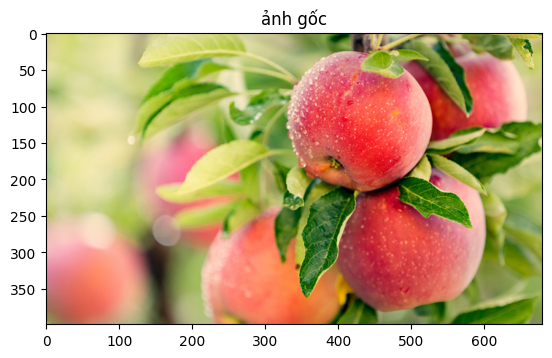

In [3]:
#Đọc và hiển thị ảnh gốc ban đầu: Apples.jpg
img_orignal = cv2.imread('images/Apples.jpg',cv2.IMREAD_COLOR_RGB)

if img_orignal is None:
    print("đọc ảnh lỗi")
else:
    #hiển thị ảnh
    plt.imshow(img_orignal)
    plt.title("ảnh gốc")
    plt.show()


In [3]:
#Lấy kích thước ảnh ban đầu:
h=img_orignal.shape[0]
w=img_orignal.shape[1]
pixel = h*w
print("kích thước ảnh gốc: ", h, 'x', w)
print("số pixel ảnh ",pixel)

kích thước ảnh gốc:  399 x 680
số pixel ảnh  271320


## Các tham số của phương thức resize:
---

**cv2.resize(src, dsize, interpolation)**

Ý nghĩa các tham số:

1. src: ảnh gốc cần thay đổi kích thước.
2. dsize (width, height): Kích thước ảnh muốn thay đổi
3. interpolation: chỉ định thuật toán thực hiện resize:
* INTER_NEAREST – nội suy láng giềng gần nhất
* INTER_LINEAR – nội suy song tuyến tính (mặc định)
* INTER_AREA – nội suy theo vùng.
* INTER_CUBIC –  nội suy xoắn bậc 3, trên  4×4 pixel láng giềng
* INTER_LANCZOS4 –  nội suy Lanczos trên 8×8 pixel láng giềng!


**Thông thường:**
* cv.INTER_AREA để thu nhỏ
* cv.INTER_CUBIC & cv.INTER_LINEAR để zoom.

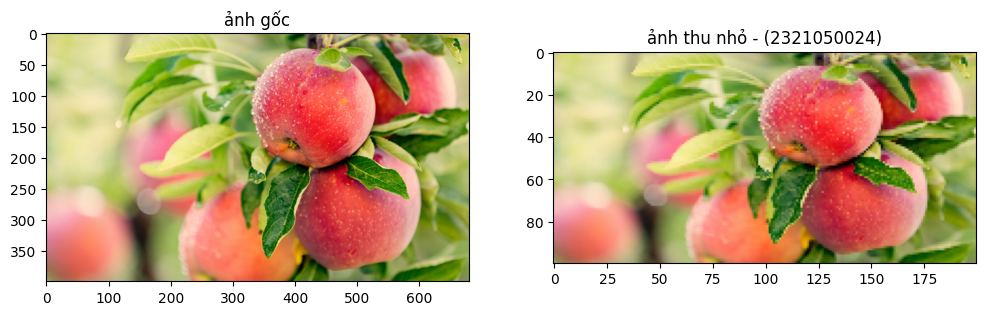

True

In [ ]:
#Resize ảnh với các thuật toán khác nhau:
#1 thu nhỏ hình ảnh
size_new = [200,100] #kích thước mới rộng cao

#thức hiện thay đổi
img_zoom_in = cv2.resize(img_orignal, size_new, cv2.INTER_AREA)

#hiển thị kết quả: hiển thị ảnh gốc và ảnh sau khi resize
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_orignal)
plt.title("ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(img_zoom_in)
plt.title("ảnh thu nhỏ - (2321050024)")

plt.show()

#lưu ảnh ra file
cv2.imwrite('images/Apples_in.jpg',cv2.cvtColor(img_zoom_in,cv2.COLOR_RGB2BGR))

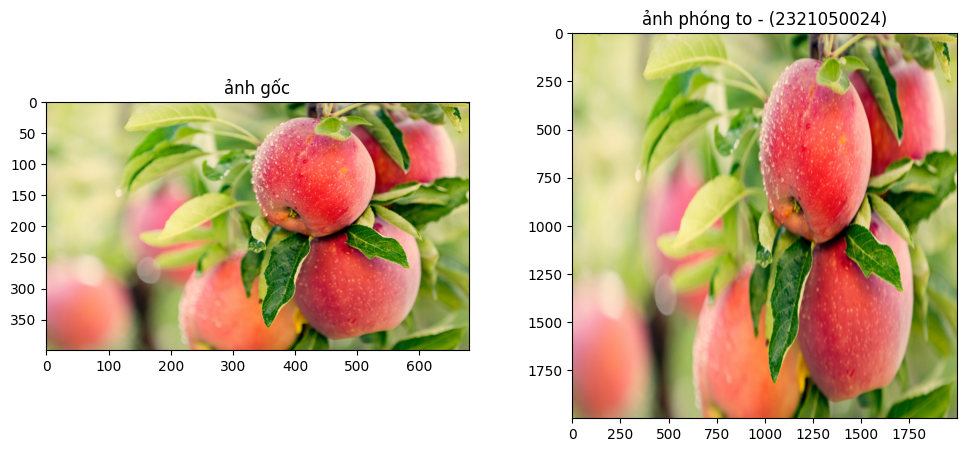

True

In [7]:
#phóng to ảnh
size_new = [2000,2000]

#thực hiện thay đổi
img_zoom_out = cv2.resize(img_orignal, size_new) #thuật toán mặc định

#hiển thị kết quả: hiển thị ảnh gốc và ảnh sau khi resize
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_orignal)
plt.title("ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(img_zoom_out)
plt.title("ảnh phóng to - (2321050024)")

plt.show()

#lưu ảnh ra file
cv2.imwrite('images/Apples_out.jpg',cv2.cvtColor(img_zoom_in,cv2.COLOR_RGB2BGR))



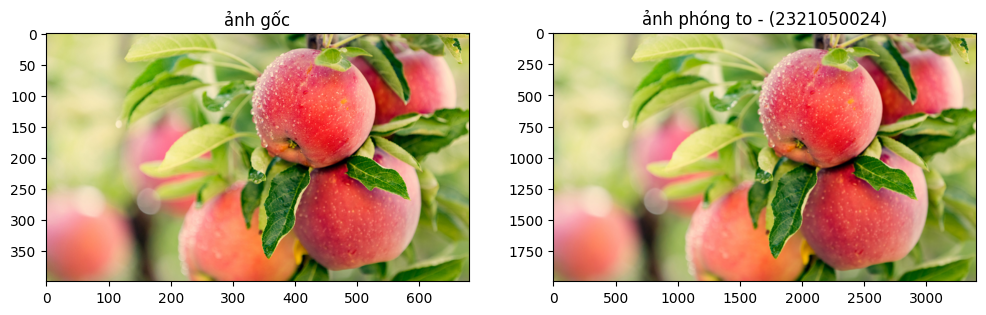

In [9]:
#Thay đổi kích thước ảnh theo tỷ lệ % (scale) nhập vào: 
# Nếu scale <100 thu nhỏ 
# Nếu scale = 100 giữ nguyên
# Nếu scale>100 phóng to

scale = float(input("nhập vào tỉ lệ % muốn thay đổi kích thước ảnh"))

#tính kích thước ảnh mới
h_new=int(h*scale/100)
w_new=int(w*scale/100)

img_scale = cv2.resize(img_orignal,(w_new,h_new), cv2.INTER_NEAREST)

#hiển thị kết quả: hiển thị ảnh gốc và ảnh sau khi resize
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_orignal)
plt.title("ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(img_scale)
plt.title("ảnh phóng to - (2321050024)")

plt.show()



## THỰC HÀNH 2.1: 
---
**Yêu cầu 1:** Sinh viên đọc ảnh màu images/Thuchanh_2_1.jpg và chuyển đổi sang hệ RGB, hiển thị ảnh

**Yêu cầu 2:** Cho biết chiều cao, chiều rộng và số pixel điểm ảnh.

**Yêu cầu 3:** Thực hiện thay đổi kích thước theo yêu cầu sau:

    3.1. Thay đổi kích thước ảnh về 32x32, sử dụng tham số interpolation mặc định. Hiển thị kết quả và Lưu lại ảnh vào thư mục images/Saves/MSV_img_31.jpg theo hệ màu BGR
    
    3.2. Giữ nguyên chiều cao của ảnh gốc, giảm chiều rộng ảnh đi một nửa, Sử dụng phương pháp INTER_NEAREST.Hiển thị kết quả và Lưu lại ảnh vào thư mục images/Saves/MSV_img_32.jpg theo hệ màu BGR
    
    3.3. Tăng chiều cao của ảnh lên gấp đôi, giữ nguyên chiều rộng của ảnh gốc; Sử dụng phương pháp INTER_LANCZOS4. Hiển thị kết quả và Lưu lại ảnh vào thư mục images/Saves/MSV_img_33.jpg theo hệ màu BGR

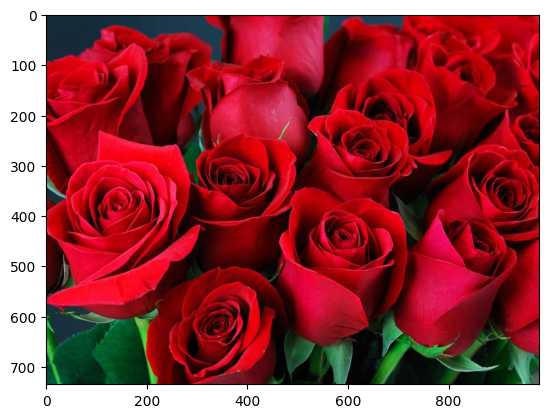

In [10]:
#{SINH VIÊN VIẾT CODE Ở ĐÂY:}
#1. Đọc ảnh và hiển thị ảnh:
img_thuchanh_2_1=cv2.imread('images/Thuchanh_2_1.jpg',cv2.IMREAD_COLOR_RGB)
plt.imshow(img_thuchanh_2_1)
plt.show()


In [15]:
#2. Chiều cao, chiều rộng và số pixel điểm ảnh:
h=img_thuchanh_2_1.shape[0]
w=img_thuchanh_2_1.shape[1]

print("chiều cao của ảnh: ",h)
print("chiều rộng của ảnh: ",w)




chiều cao của ảnh:  735
chiều rộng của ảnh:  980


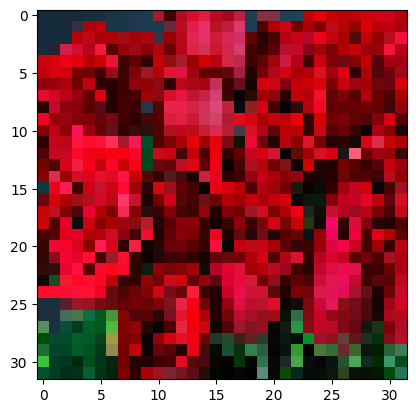

True

In [13]:
#3. Thực hiện thay đổi kích thước theo yêu cầu sau:
#3.1. Thay đổi kích thước ảnh về 32x32, sử dụng tham số interpolation mặc định. 
# Hiển thị kết quả và Lưu lại ảnh vào thư mục Saves/MSV_img_1.jpg theo hệ màu BGR

size_new = [32,32]
img_new=cv2.resize(img_thuchanh_2_1,size_new)

plt.imshow(img_new)
plt.show()

cv2.imwrite('images/Saves/MSV_img_1.jpg',cv2.cvtColor(img_new,cv2.COLOR_RGB2BGR))




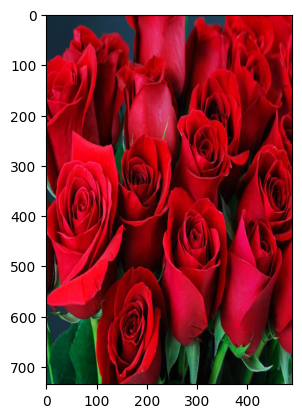

True

In [20]:
#3.2. Giữ nguyên chiều cao của ảnh gốc, giảm chiều rộng ảnh đi một nửa, 
#Sử dụng phương pháp INTER_NEAREST.
#Hiển thị kết quả và Lưu lại ảnh vào thư mục images/Saves/MSV_img_2.jpg theo hệ màu BGR

size_new=[int(w/2),h]
img_new=cv2.resize(img_thuchanh_2_1,size_new, cv2.INTER_NEAREST)

plt.imshow(img_new)
plt.show()

cv2.imwrite('images/Saves/MSV_img_2.jpg',cv2.cvtColor(img_new,cv2.COLOR_RGB2BGR))




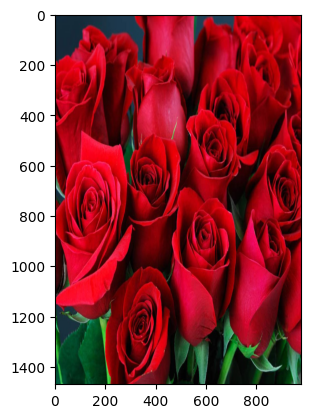

True

In [22]:
#3.3 Tăng chiều cao của ảnh lên gấp đôi, giữ nguyên chiều rộng của ảnh gốc; 
#Sử dụng phương pháp INTER_LANCZOS4. 
#Hiển thị kết quả và Lưu lại ảnh vào thư mục images/Saves/MSV_img_3.jpg theo hệ màu BGR

size_new=[w,h*2]
img_new=cv2.resize(img_thuchanh_2_1,size_new, cv2.INTER_LANCZOS4)

plt.imshow(img_new)
plt.show()

cv2.imwrite('images/Saves/MSV_img_3.jpg',cv2.cvtColor(img_new,cv2.COLOR_RGB2BGR))





## THỰC HÀNH 2.1 (Tiếp): 
---
Thay đổi kích thước nhiều ảnh:

**Yêu cầu 4:** Sinh viên sử dụng thư mục chứa các ảnh đã đổi tên thực hiện trong bài thực hành 1.3 chương 1. Thực hiện thay đổi kích thước toàn bộ ảnh về độ phân giải 256x256 pixel. Lưu lại ảnh đã thay đổi vào thư mục mới có tên Pic_256 và đặt lại tên ảnh như sau: Pic_256_i.jpg với i là các số thứ tự của ảnh.


In [ ]:
# {SINH VIÊN VIẾT CODE VÀO ĐÂY}





## 2. Cắt ảnh (Cropping Images)
---
Thực hiện cắt một phần của ảnh, sử dụng phương pháp tách các phần tử trong ma trận:
* Ảnh nhị phân, ảnh xám --> Ma trận [hàng (chiều cao ảnh), côt (chiều rộng ảnh)]
* Ảnh màu ---> Mảng 3 chiều [hàng (chiều cao ảnh), côt (chiều rộng ảnh),màu (BGR)]

**img_cropped = img[start_row:end_row, start_col:end_col]**

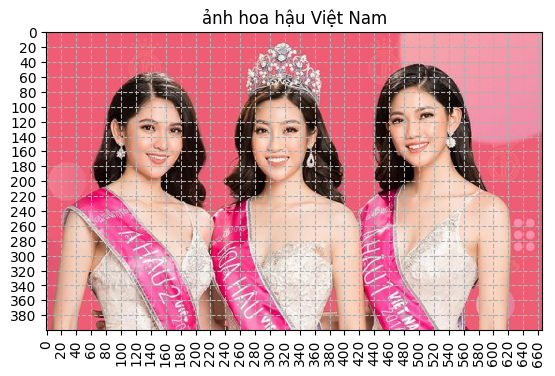

In [26]:
#Đọc và hiển thị ảnh màu: MissVN.jpg
img_crop = cv2.imread('images/MissVN.jpg',cv2.IMREAD_COLOR_RGB)

if img_crop is None:
    print("lỗi đọc ảnh")
else:
    plt.imshow(img_crop)
    plt.title("ảnh hoa hậu Việt Nam")
    #chia nhỏ lưới
    plt.xticks(range(0,img_crop.shape[1], 20), rotation=90)
    plt.yticks(range(0,img_crop.shape[0], 20))
    plt.grid(ls='--')
    plt.show()



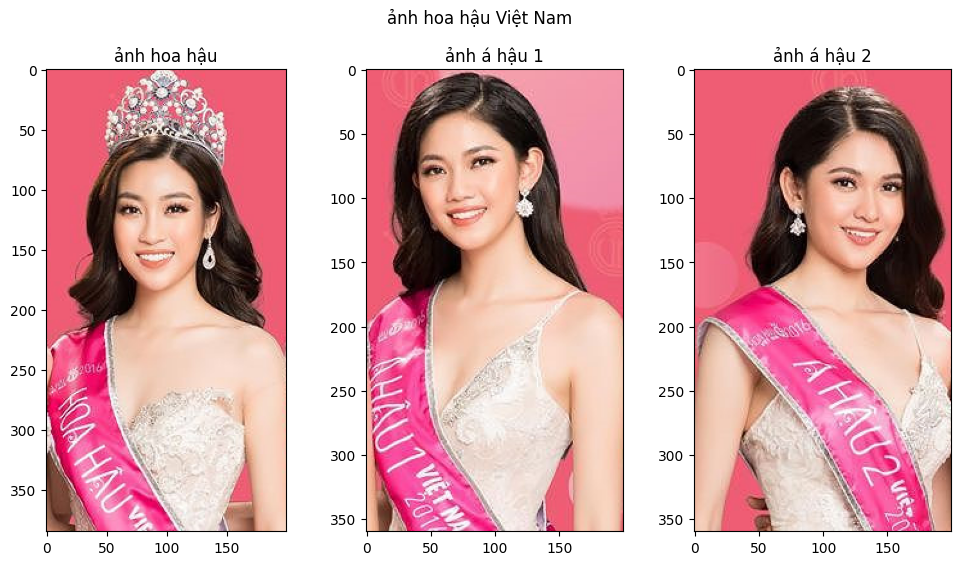

In [ ]:
#Cắt lấy từng người trong ảnh gốc:
img_hoahau = img_crop[15:,220:420]
img_ahau1 = img_crop[40:, 420:620]
img_ahau2 = img_crop[40:, 20:220]

#hiển thị
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img_hoahau)
plt.title("ảnh hoa hậu")

plt.subplot(1,3,2)
plt.imshow(img_ahau1)
plt.title("ảnh á hậu 1")

plt.subplot(1,3,3)
plt.imshow(img_ahau2)
plt.title("ảnh á hậu 2")

plt.suptitle("ảnh hoa hậu Việt Nam")
plt.show()

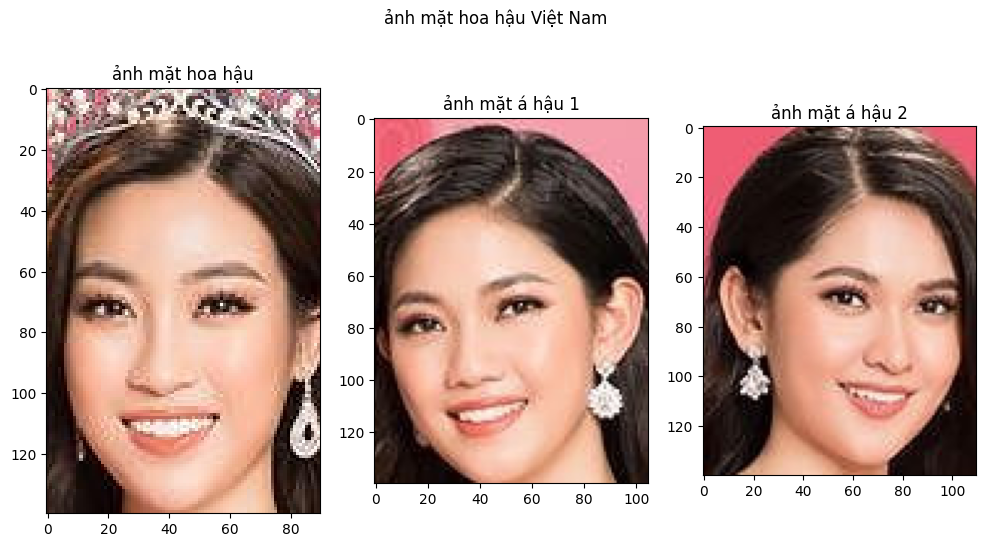

In [31]:
#Sinh viên thực hiện Chỉ Cắt lấy khuôn mặt của từng người trong ảnh gốc và hiển thị kết quả
img_mat_hoahau=img_crop[60:200,270:360]
img_mat_ahau1=img_crop[40:180,455:560]
img_mat_ahau2=img_crop[60:200,80:190]

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img_mat_hoahau)
plt.title("ảnh mặt hoa hậu")

plt.subplot(1,3,2)
plt.imshow(img_mat_ahau1)
plt.title("ảnh mặt á hậu 1")

plt.subplot(1,3,3)
plt.imshow(img_mat_ahau2)
plt.title("ảnh mặt á hậu 2")

plt.suptitle("ảnh mặt hoa hậu Việt Nam")
plt.show()

In [ ]:
#CẮT ẢNH THEO MỘT VÙNG LỰA CHỌN BẰNG CHUỘT VỚI PHƯƠNG THỨC cv2.selectROI():
import cv2
import numpy as np
import matplotlib.pyplot as plt  
  
#Đọc ảnh:
img_miss = cv2.imread('images/MissVN.jpg')
  
# Select ROI: Lấy một vùng trong ảnh --> Toạ độ của vùng ảnh 
r = cv2.selectROI("select the area", img_miss)

print(r)

#Cắt ảnh theo vùng được chọn
cropped_image = img_miss[int(r[1]):int(r[1]+r[3]), 
                      int(r[0]):int(r[0]+r[2])]
  
# Hiển thị ảnh đã cắt:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))
plt.grid(ls='--')
plt.show()

Hàm cv2.selectROI() trả về một tuple gồm 4 giá trị: (x,y,w,h)

* x: Tọa độ x của góc trên bên trái của hình chữ nhật (tính từ góc trái trên cùng của ảnh).
* y: Tọa độ y của góc trên bên trái của hình chữ nhật (tính từ góc trái trên cùng của ảnh).
* w: Chiều rộng (width) của hình chữ nhật.
* h: Chiều cao (height) của hình chữ nhật.

## THỰC HÀNH 2.2: 
---
Yêu cầu :
* Sinh viên đọc và hiển thị ảnh images/Thuchanh_2_2.jpg ở dạng ảnh xám.
* Cắt lấy từng con số và ký tự có trong ảnh, Hiển thị và lưu ảnh đã cắt vào thư mục images/Saves/ với tên tương ứng là MSV_kytutuongung.jpg
<img src = 'images/Thuchanh_2_2.jpg' width='300px'>

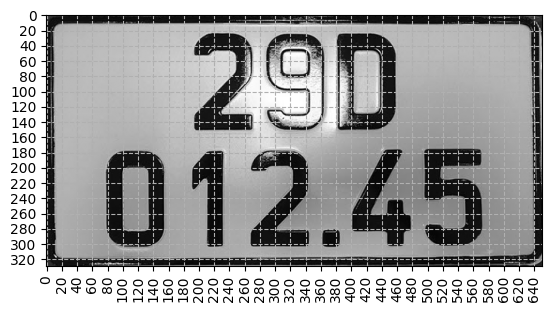

In [13]:
#{SINH VIÊN VIẾT CODE VÀO ĐÂY:}
#Đọc ảnh xám:
img_thuchanh_2_2=cv2.imread('images/Thuchanh_2_2.jpg',0)
plt.imshow(img_thuchanh_2_2,cmap='gray')
plt.grid(ls='--')
plt.xticks(range(0, img_thuchanh_2_2.shape[1],20),rotation=90 )
plt.yticks(range(0, img_thuchanh_2_2.shape[0],20))
plt.show()


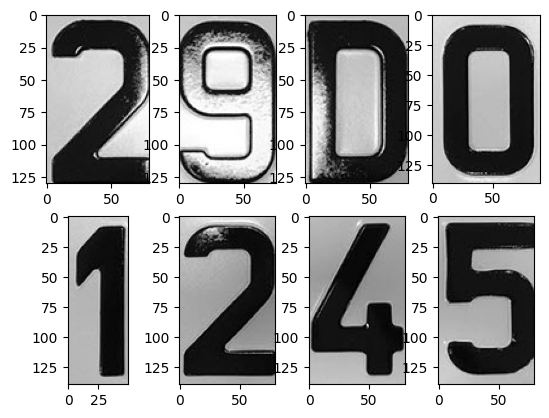

In [16]:
img_tren_2=img_thuchanh_2_2[20:150,190:270]
img_tren_9=img_thuchanh_2_2[20:150,290:365]
img_tren_D=img_thuchanh_2_2[20:150,380:460]

img_duoi_0=img_thuchanh_2_2[170:310,70:160]
img_duoi_1=img_thuchanh_2_2[170:310,185:235]
img_duoi_2=img_thuchanh_2_2[170:310,265:345]
img_duoi_4=img_thuchanh_2_2[170:310,400:480]
img_duoi_5=img_thuchanh_2_2[170:310,490:570]

plt.subplot(2,4,1)
plt.imshow(img_tren_2,cmap="gray")

plt.subplot(2,4,2)
plt.imshow(img_tren_9,cmap="gray")

plt.subplot(2,4,3)
plt.imshow(img_tren_D,cmap="gray")

plt.subplot(2,4,4)
plt.imshow(img_duoi_0,cmap="gray")

plt.subplot(2,4,5)
plt.imshow(img_duoi_1,cmap="gray")

plt.subplot(2,4,6)
plt.imshow(img_duoi_2,cmap="gray")

plt.subplot(2,4,7)
plt.imshow(img_duoi_4,cmap="gray")

plt.subplot(2,4,8)
plt.imshow(img_duoi_5,cmap="gray")

plt.show()


In [17]:
cv2.imwrite('images/Saves/2321050024_2.jpg',img_tren_2)
cv2.imwrite('images/Saves/2321050024_9.jpg',img_tren_9)
cv2.imwrite('images/Saves/2321050024_D.jpg',img_tren_D)

cv2.imwrite('images/Saves/2321050024_0.jpg',img_duoi_0)
cv2.imwrite('images/Saves/2321050024_1.jpg',img_duoi_1)
cv2.imwrite('images/Saves/2321050024_2_.jpg',img_duoi_2)
cv2.imwrite('images/Saves/2321050024_4.jpg',img_duoi_4)
cv2.imwrite('images/Saves/2321050024_5.jpg',img_duoi_5)

True

## 3. Xoay ảnh (Rotate Images)
---
OpenCV hỗ trợ phương thức xoay ảnh:
 **cv2.rotate(img, rotateCode)**
 
 Trong đó:
 1. img: ảnh gốc muốn xoay
 2. rotateCode: các chế độ xoay ảnh:
     * cv2.ROTATE_90_CLOCKWISE: Xoay 90 độ theo chiều kim đồng hồ
     * cv2.ROTATE_90_COUNTERCLOCKWISE: Xoay 90 độ ngược chiều kim đồng hồ
     * cv2.ROTATE_180: Xoay ảnh 180 (lật ảnh)

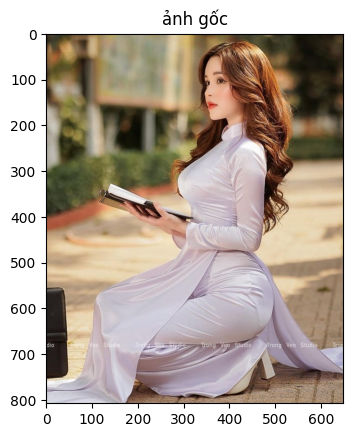

In [18]:
#Đọc và hiển thị ảnh màu: Pic_1.jpg
img_rotate = cv2.imread('images/Pic_1.jpg',cv2.IMREAD_COLOR_RGB)

if img_rotate is None:
    print("đọc ảnh lỗi")
else:
    plt.imshow(img_rotate)
    plt.title("ảnh gốc")
    plt.show()



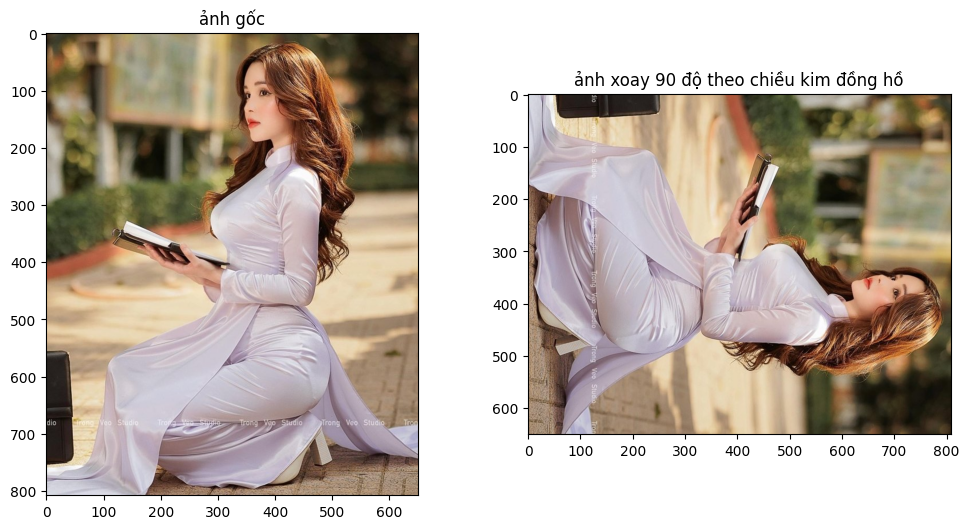

In [19]:
#Xoay ảnh 90 độ theo chiều kim đồng hồ: (cv2.ROTATE_90_CLOCKWISE)
img_rotate_90 = cv2.rotate(img_rotate, cv2.ROTATE_90_CLOCKWISE)

#hiển thị
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rotate)
plt.title("ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(img_rotate_90)
plt.title("ảnh xoay 90 độ theo chiều kim đồng hồ")

plt.show()

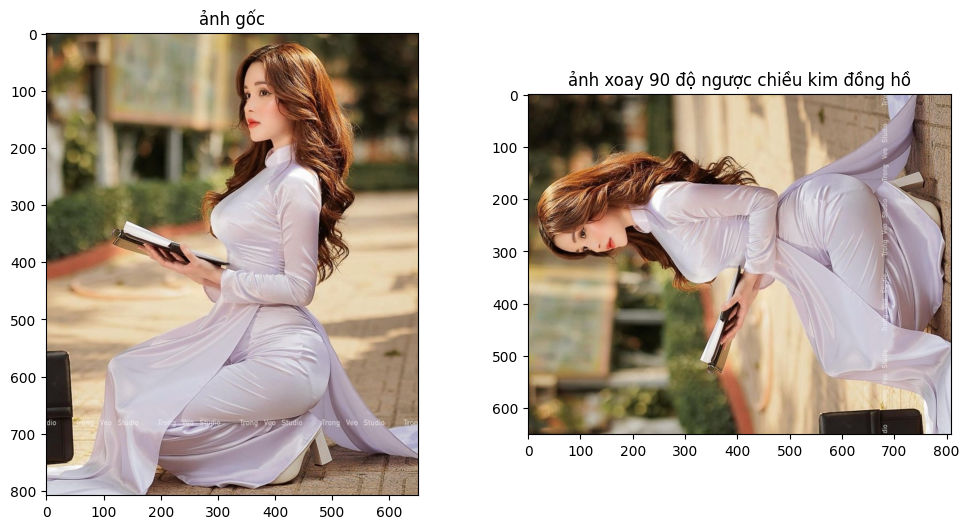

In [20]:
#Xoay ảnh 90 độ ngược chiều kim đồng hồ: (cv2.ROTATE_90_COUNTERCLOCKWISE)
img_rotate_90_nguoc = cv2.rotate(img_rotate, cv2.ROTATE_90_COUNTERCLOCKWISE)

#hiển thị
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rotate)
plt.title("ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(img_rotate_90_nguoc)
plt.title("ảnh xoay 90 độ ngược chiều kim đồng hồ")

plt.show()




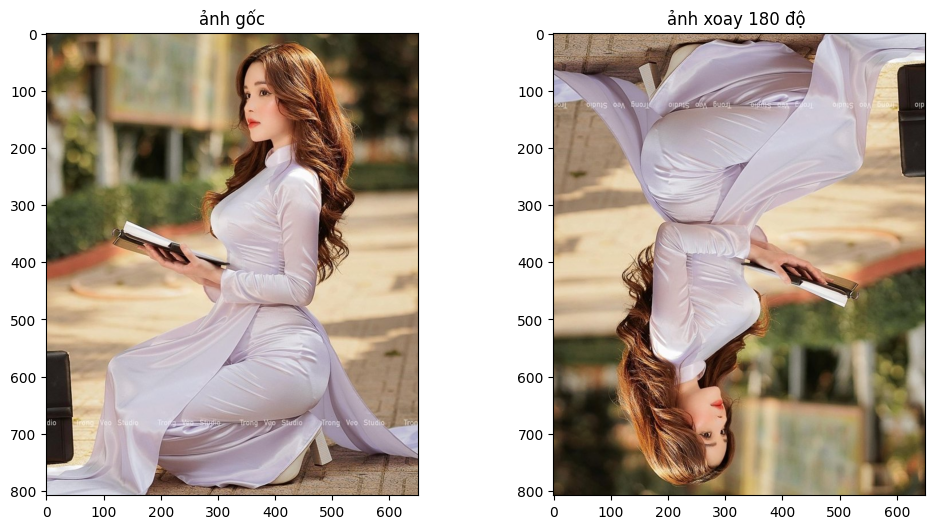

In [21]:
#Xoay ảnh 180 độ: (cv2.ROTATE_180)

img_rotate_180 = cv2.rotate(img_rotate, cv2.ROTATE_180)

#hiển thị
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rotate)
plt.title("ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(img_rotate_180)
plt.title("ảnh xoay 180 độ ")

plt.show()

## 4. Lật ảnh (Flip Images)
---
OpenCV hỗ trợ phương thức lật ảnh:
 **cv2.flip(img, flipCode)**
 
 Trong đó:
 1. img: ảnh gốc muốn xoay
 2. flipCode: các chế độ lật ảnh:
     * flipCode = 0: Lật ảnh theo chiều ngang
     * flipCode > 0: Lật ảnh theo chiều dọc
     * flipCode < 0: Lật ảnh theo chiều ngang và dọc

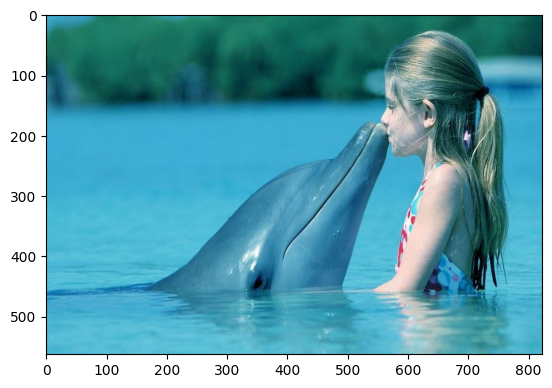

In [22]:
#Đọc và hiển thị ảnh màu: fish.jpg
img_flip = cv2.imread("images/fish.jpg",cv2.IMREAD_COLOR_RGB)

#hiển thị ảnh
plt.imshow(img_flip)
plt.show()

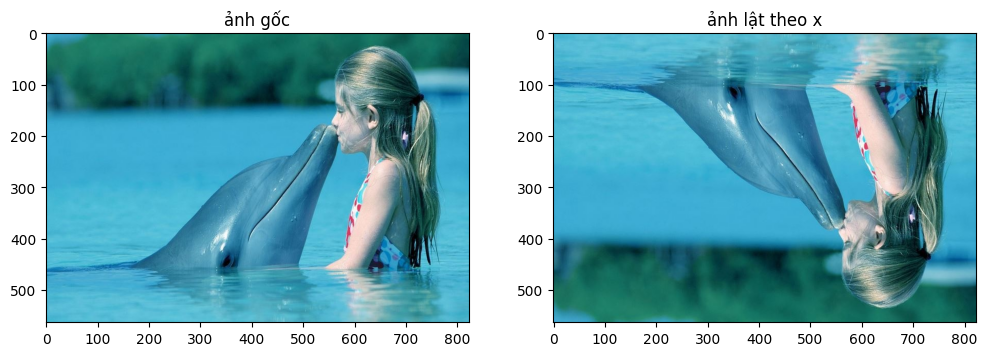

In [24]:
#Lật ảnh theo chiều ngang (trục X): flipCode = 0
img_x=cv2.flip(img_flip,0)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_flip)
plt.title("ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(img_x)
plt.title("ảnh lật theo x")

plt.show()

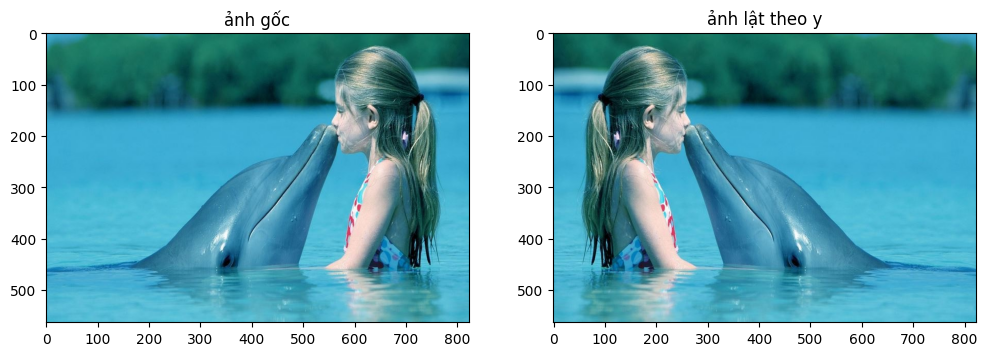

In [25]:
#Lật ảnh theo chiều dọc (trục Y): flipCode > 0
img_y=cv2.flip(img_flip,1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_flip)
plt.title("ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(img_y)
plt.title("ảnh lật theo y")

plt.show()



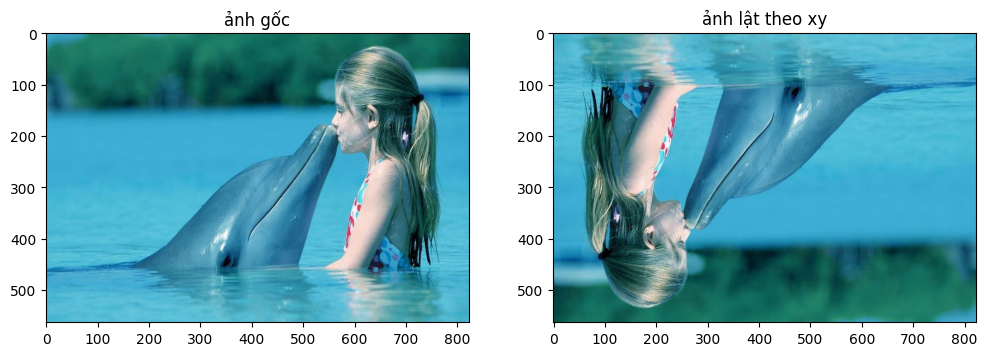

In [26]:
#Lật ảnh theo cả 2 chiều ngang, dọc (theo trục Y, X): flipCode < 0
img_xy=cv2.flip(img_flip,-1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_flip)
plt.title("ảnh gốc")

plt.subplot(1,2,2)
plt.imshow(img_xy)
plt.title("ảnh lật theo xy")

plt.show()



## THỰC HÀNH 2.3: 
---
**Yêu cầu 1:**

* Sinh viên đọc và hiển thị ảnh images/Thuchanh_2_3.jpg ở chế độ mặc định.
* Thực hiện xoay ảnh 90 độ thuận và ngược chiều kim đồng hồ.
* Thực hiện lật ảnh theo chiều ngang và dọc
* Hiển thị và lưu các ảnh đã xoay, lật vào thư mục images/Saves/
<img src = 'images/Thuchanh_2_3.jpg' width='300px'>

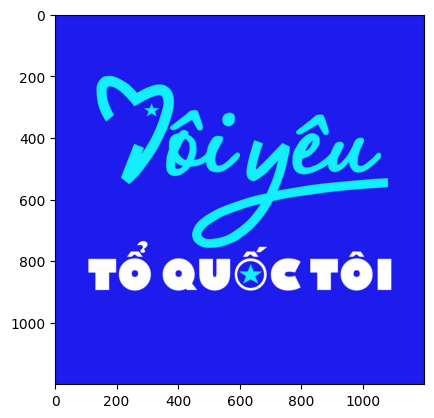

In [29]:
#{SINH VIÊN VIẾT CODE VÀO ĐÂY}
#Đọc ảnh
img_thuchanh_2_3=cv2.imread('images/Thuchanh_2_3.jpg')

plt.imshow(img_thuchanh_2_3)
plt.show()


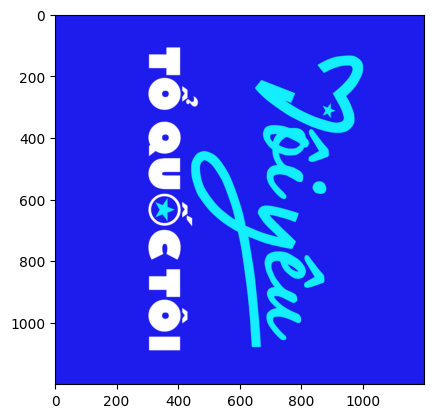

True

In [31]:
img_thuchanh_2_3_90=cv2.rotate(img_thuchanh_2_3, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img_thuchanh_2_3_90)
plt.show()

cv2.imwrite('images/Saves/anh_xoay_90_do_theo_chieu_kim_dong_ho.jpg',img_thuchanh_2_3_90)

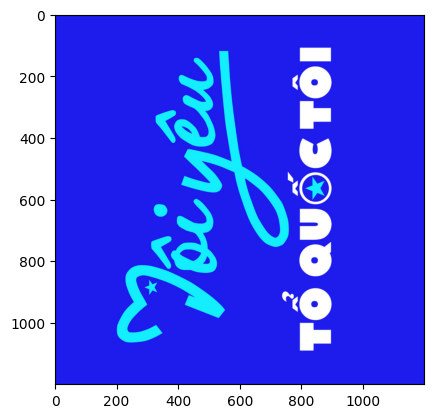

True

In [32]:
img_thuchanh_2_3_90_nguoc=cv2.rotate(img_thuchanh_2_3, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(img_thuchanh_2_3_90_nguoc)
plt.show()

cv2.imwrite('images/Saves/anh_xoay_90_do_nguoc_chieu_kim_dong_ho.jpg',img_thuchanh_2_3_90_nguoc)

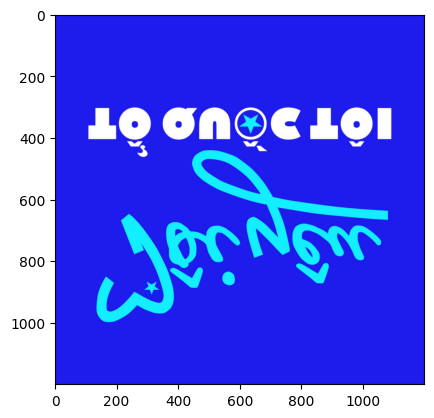

True

In [33]:
img_thuchanh_2_3_x=cv2.flip(img_thuchanh_2_3,0)
plt.imshow(img_thuchanh_2_3_x)
plt.show()

cv2.imwrite('images/Saves/anh_lat_theo_x.jpg',img_thuchanh_2_3_x)

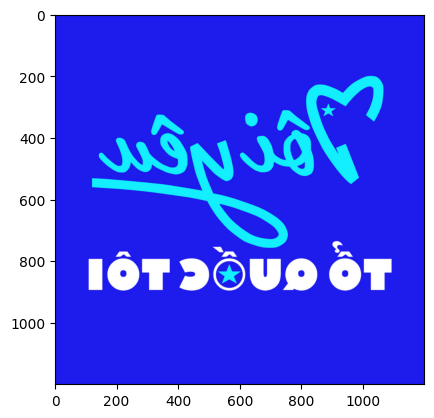

True

In [34]:
img_thuchanh_2_3_y=cv2.flip(img_thuchanh_2_3,1)
plt.imshow(img_thuchanh_2_3_y)
plt.show()

cv2.imwrite('images/Saves/anh_lat_theo_y.jpg',img_thuchanh_2_3_y)

## THỰC HÀNH 2.3 (Tiếp): 
---
Thay đổi kích thước nhiều ảnh:

**Yêu cầu 2:** Sinh viên sử dụng thư mục Pic_256 đã tạo ở bài thực hành 2.1 yêu cầu 4 ở trên. với mỗi một ảnh trong thư mục thực hiện lật ảnh theo trục Y và lưu thành một ảnh mới vào cùng thư mục Pic_256 với tên ảnh là tên ảnh cũ + flip ví dụ: Pic_256_1_flip.jpg

In [ ]:
#{SINH VIÊN VIẾT CODE VÀO ĐÂY}



